#Model machine learning klasifikasi jenis hewan di kebun binatang

Menggolongkan hewan ke dalam 7 kelas: 
*   Kelas 1 - Mamalia
*   Kelas 2 - Unggas
*   Kelas 3 - Amphibi
*   Kelas 4 - Ikan
*   Kelas 5 - Katak
*   Kelas 6 - Serangga
*   Kelas 7 - Lainnya

##1. Penyiapan Data

####Meng-*import* library

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#### Memuat data dari dataset

In [ ]:
zoo_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science and AI (Microsoft Programme)/Assignment/zoo.data', names=['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'])
zoo_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


####Mengecek jumlah row

In [ ]:
print('Number of rows:', len(zoo_data))

Number of rows: 101


####Mengecek kelengkapan data
Semua data lengkap, tidak ada yang *null*

In [ ]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


####*Summary* dari kolom 'type'

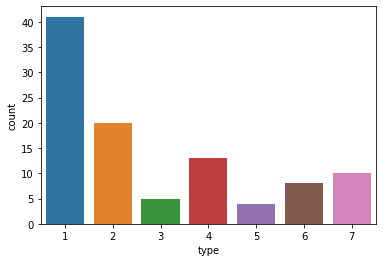

In [ ]:
sns.countplot(zoo_data['type'],label="Count")
plt.show()

###Correlation plot ke-16 fitur 

Kolom 'animal_name' dan 'type' tidak diikutsertakan

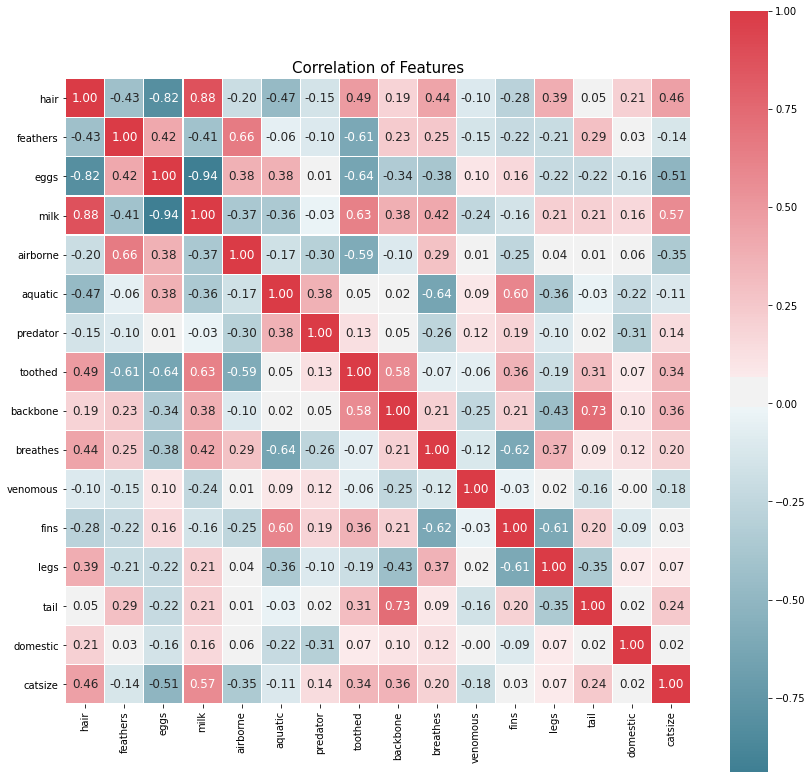

In [ ]:
corr = zoo_data.iloc[:,1:-1].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Features', y=1.05, size=15) 
plt.show()

## 2. Ekstraksi Fitur dan Prapemrosesan


Mengecek apakah terdapat data yang *double* dalam kolom 'animal_name'

In [ ]:
double = zoo_data.animal_name.value_counts()
double [double > 1]

frog    2
Name: animal_name, dtype: int64

Melihat isi data yang double 

In [ ]:
frog = zoo_data.loc[zoo_data['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


Ternyata kedua *frog* berbeda, satunya *venomous* dan yang satunya lagi tidak. Oleh karena itu, keduanya dibedakan.

In [ ]:
zoo_data['animal_name'][(zoo_data.venomous == 1 )& (zoo_data.animal_name == 'frog')] = "venoumous_frog"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


####Membagi antara fitur independen (X) dan fitur dependen (y)

X : kolom yang di-*train* (fitur-fitur yang digunakan untuk memprediksi 'type') (kolom 'type' dan 'animal_name' dieleminasi)

y : kolom yang akan dibandingkan dengan hasil prediksi (memuat isi kolom 'type')

In [ ]:
X = zoo_data.drop(['type','animal_name'],axis=1)
y = zoo_data.iloc[:,-1:]

print("fitur independen :", X.shape)
print("fitur dependen   :", y.shape)

fitur independen : (101, 16)
fitur dependen   : (101, 1)


Melihat fitur independen

In [ ]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


Melihat fitur dependen

In [ ]:
y.head()

,type
0,1
1,1
2,4
3,1
4,1


## 3. Pembagian Data *Training* dan Data Tes

####Membagi antara *traning data* dan *testing data*

70% untuk training, 30% untuk testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle = True,test_size = 0.3)

print("training data :",X_train.shape)
print("testing data  :",X_test.shape)

training data : (70, 16)
testing data  : (31, 16)


## 4. *Training* dan *testing* data

Metode yang digunakan:

*   Decision Tree
*   Random Forest
*   K-Nearest Neighbors



####*Decision Tree Classification*

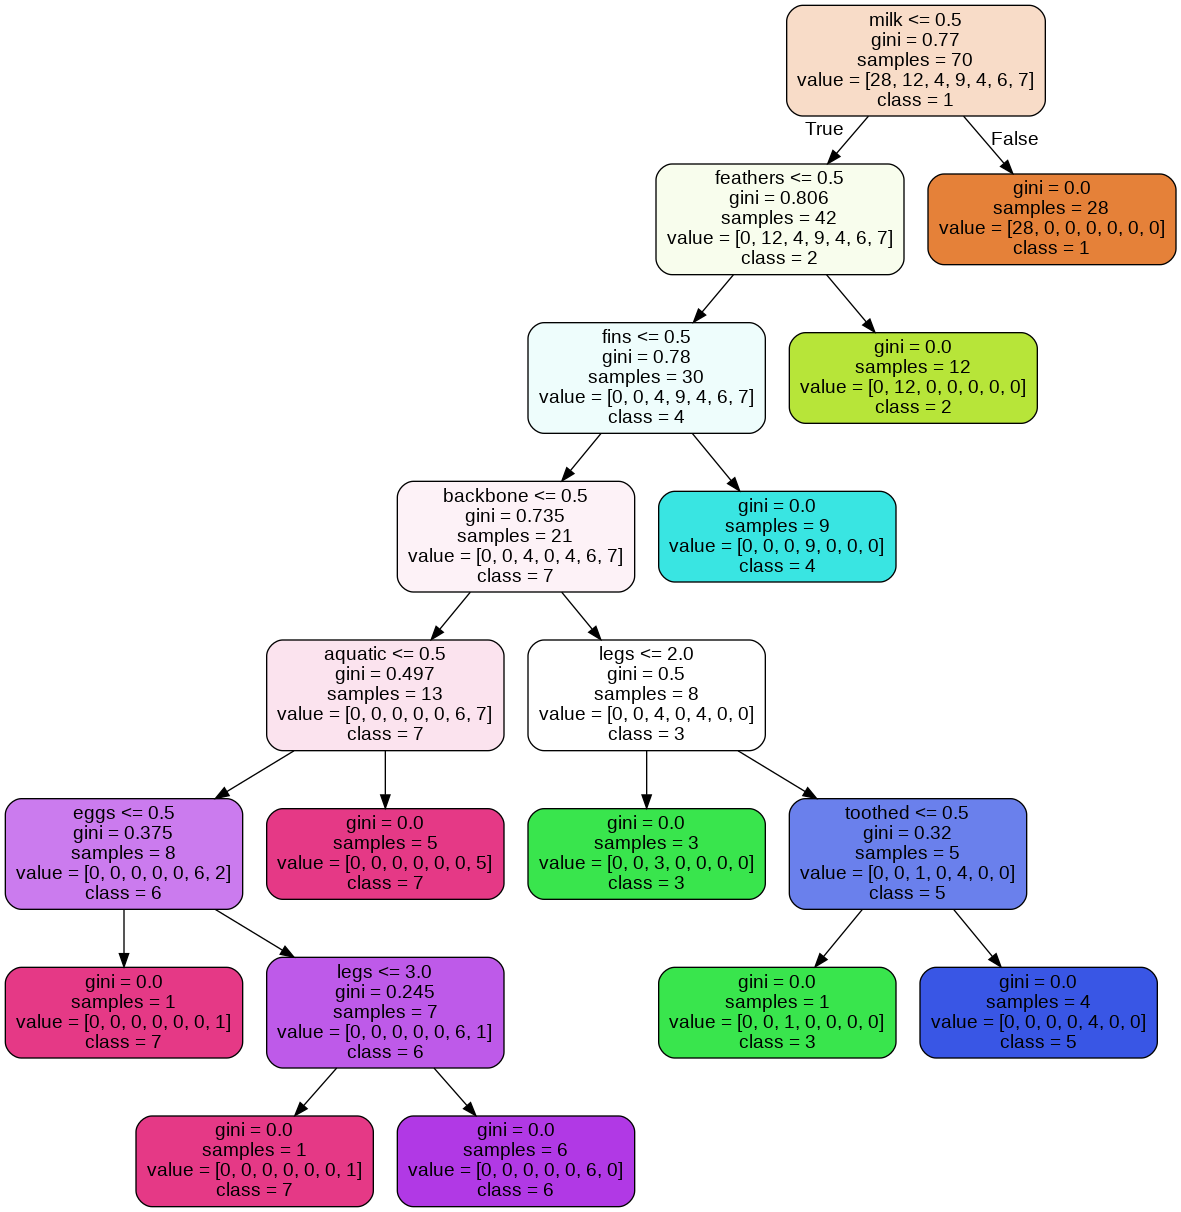

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Declare and train the model
clf_DT = DecisionTreeClassifier(random_state = 0,criterion='gini')
clf_DT.fit(X_train, y_train)

y_pred_DT = clf_DT.predict(X_test)

global tree  
# Get the tree
tree = []
tree = clf_DT

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=["1","2","3","4","5","6","7" ],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png())

#####Evaluasi

Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
score_DT=cross_val_score(clf_DT, X,y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score_DT.mean(), score_DT.std() * 2))

Accuracy: 0.96 (+/- 0.13)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Classification Report

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y_test,y_pred_DT))

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.71      0.71      0.71        31
weighted avg       0.97      0.97      0.97        31



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix

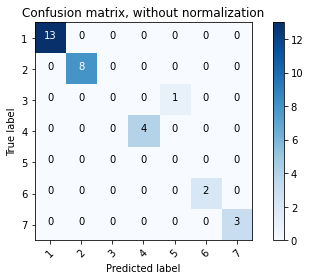

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    # This function prints and plots the confusion matrix.
    # Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_DT,labels=[1, 2,3,4,5,6,7])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1, 2,3,4,5,6,7],
                      title='Confusion matrix, without normalization')

####*Random Forest Classifier*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier()
clf_RF.fit(X_train,y_train.values.ravel())
y_pred_RF = clf_RF.predict(X_test)

#####Evaluasi

Cross validation

In [ ]:
score_RF=cross_val_score(clf_RF, X,y.values.ravel(), cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score_RF.mean(), score_RF.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 0.97 (+/- 0.09)


Classification Report

In [ ]:
print("Classification Report: \n",classification_report(y_test,y_pred_RF))

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



Confusion Matrix

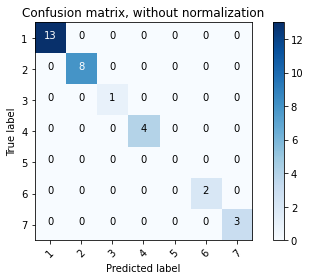

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    # This function prints and plots the confusion matrix.
    # Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_RF,labels=[1, 2,3,4,5,6,7])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1, 2,3,4,5,6,7],
                      title='Confusion matrix, without normalization')

####*K-Nearest Neighbors Classifier*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier(n_neighbors=3)
clf_KNN.fit(X_train,y_train.values.ravel())
y_pred_KNN = clf_KNN.predict(X_test)

#####Evaluasi

Cross Validation

In [ ]:

score_KNN=cross_val_score(clf_KNN, X,y.values.ravel(), cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score_KNN.mean(), score_KNN.std() * 2))

Accuracy: 0.95 (+/- 0.10)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Classification Report

In [ ]:
print("Classification Report: \n",classification_report(y_test,y_pred_KNN))

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.71      0.71      0.71        31
weighted avg       0.97      0.97      0.97        31



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix

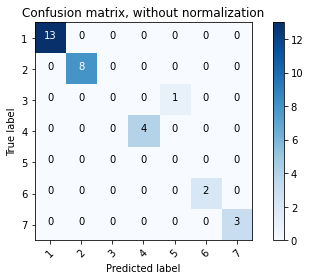

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    # This function prints and plots the confusion matrix.
    # Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_KNN,labels=[1, 2,3,4,5,6,7])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1, 2,3,4,5,6,7],
                      title='Confusion matrix, without normalization')

## 5. *Deploy* Model *Machine Learning*

Digunakan package "pickle"


In [ ]:
import pickle

pickle.dump(clf_DT,open('model_zoo_DT.pk','wb'))
pickle.dump(clf_RF,open('model_zoo_RF.pk','wb'))
pickle.dump(clf_KNN,open('model_zoo_KNN.pk','wb'))

## 6. Mencoba Prediksi Data dengan Model yang Telah Dibuat

Diuji masukan data array binatang crab yang merupakan bintang kelas 7

Decision Tree

In [ ]:
loaded_model = pickle.load(open('model_zoo_DT.pk','rb'))
data = np.array([0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0])
data = data.reshape(1,-1)
loaded_model.predict(data)

array([7])

Random Forest

In [ ]:
loaded_model = pickle.load(open('model_zoo_RF.pk','rb'))
data = np.array([0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0])
data = data.reshape(1,-1)
loaded_model.predict(data)

array([7])

K-Nearest Neighbors

In [ ]:
loaded_model = pickle.load(open('model_zoo_KNN.pk','rb'))
data = np.array([0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0])
data = data.reshape(1,-1)
loaded_model.predict(data)

array([5])